<a href="https://colab.research.google.com/github/BRIQUE-Inc/BRIQUE-Inc.github.io/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip uninstall tensorflow-gpu
!pip install tensorflow-gpu==1.15

Found existing installation: tensorflow-gpu 2.8.0
Uninstalling tensorflow-gpu-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_gpu-2.8.0.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-gpu-2.8.0
     |████████████████████████████████| 411.5 MB 8.1 kB/s 
     |████████████████████████████████| 503 kB 45.2 MB/s 
     |████████████████████████████████| 3.8 MB 33.7 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7bef0cca5d96bae2348e1a0788ace9482b0544b39e9ee5c95ae0a5ceacf17eb5
  Stored in directory: /root/.cache/pip/wheel

In [1]:
import tensorflow as tf
print("gpu device: ", tf.test.gpu_device_name)
print("tf version : ", tf.__version__)

gpu device:  <function gpu_device_name at 0x7f6d99bc6a70>
tf version :  1.15.0


In [2]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
train = mnist.train.images
validation = mnist.validation.images
test = mnist.test.images

trlab = mnist.train.labels
vallab = mnist.validation.labels
tslab = mnist.test.labels

train = np.concatenate((train, validation), axis=0)
trlab = np.concatenate((trlab, vallab), axis=0)

In [5]:
svm = LinearSVC(dual=False)
svm.fit(train, trlab)

LinearSVC(dual=False)

In [6]:
pred = svm.predict(test)

In [7]:
accuracy_score(tslab, pred) # Accuracy

0.9183

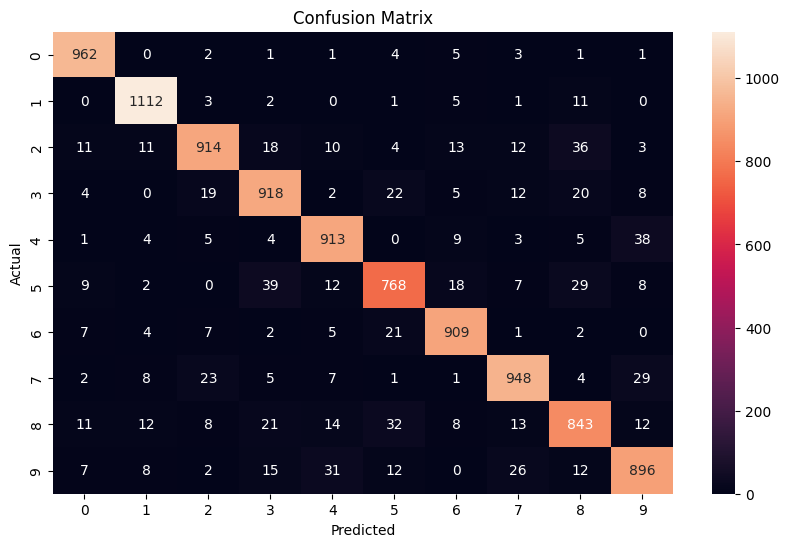

In [8]:
cm = confusion_matrix(tslab, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()